In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
raw_data = pd.read_csv(r"C:\Users\user\Desktop\MAL Anime Top 10000 Details.csv.zip")
new_data = pd.DataFrame(raw_data[["Anime Title","Type","Episodes","Aired","Producers","Studios",
                                  "Source","Genres","Score","Members","Favorites"]])
TV_data = new_data.loc[new_data["Type"]=="TV"]
Movie_data = new_data.loc[new_data["Type"]=="Movie"]
TV_data_manga = pd.read_csv(r"C:\Users\user\Downloads\TV_data_manga.txt")

In [3]:
source = TV_data['Source']
genres = TV_data['Genres']
score = TV_data['Score']
members = pd.DataFrame(TV_data['Members'])
fav = TV_data['Favorites']
studios = TV_data['Studios']

In [4]:
TV_data.insert(loc=11, column='Fav%', value=round(TV_data['Favorites']*100/TV_data['Members'], 3))

In [5]:
source_list = source.tolist() #list of sources based on index in Tv_data
source_list_unique = ["Manga", "Novel", "Game", "Other", "Audio", "Original"] #compresed source_reference list

In [6]:
a = [0] * len(TV_data)
for i in range(len(source_list)):
    if source_list[i] in ["Manga", "Web manga", "4-koma manga", "Digital manga", "Picture book"]:
        a[i] = source_list_unique.index("Manga")
    elif source_list[i] in ["Visual novel", "Light novel", "Book"]:
        a[i] = source_list_unique.index("Novel")
    elif source_list[i] in ["Card game", "Game", "Visual novel"]:
        a[i] = source_list_unique.index("Game")
    elif source_list[i] in ["Other", "Unknown"]:
        a[i] = source_list_unique.index("Other")
    elif source_list[i] in ["Radio", "Music"]:
        a[i] = source_list_unique.index("Audio")
    elif source_list[i] == "Original":
        a[i] = source_list_unique.index("Original")
TV_data["Source_reference"] = a

<ipython-input-6-1c5062921d02>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Source_reference"] = a


In [7]:
genres_list_unique = [0] * 100
index = 0;
for i in range(len(genres)):
    temp_list = genres.iloc[i].split(",")
    for element in temp_list:
        if(element.strip() not in genres_list_unique):
            genres_list_unique[index] = element.strip()
            index += 1
genres_list_unique = [i for i in genres_list_unique if i != 0] 
genres_list_unique.insert(0, "Null") #genres_list_unique contains all possible genre, first index is NULL(no genre)
genres_list_unique

['Null',
 'Action',
 'Military',
 'Adventure',
 'Comedy',
 'Drama',
 'Magic',
 'Fantasy',
 'Shounen',
 'Thriller',
 'Sci-Fi',
 'Historical',
 'Parody',
 'Samurai',
 'Super Power',
 'Mystery',
 'Game',
 'Seinen',
 'Slice of Life',
 'Supernatural',
 'Romance',
 'Vampire',
 'Mecha',
 'Sports',
 'School',
 'Space',
 'Psychological',
 'Josei',
 'Music',
 'Horror',
 'Police',
 'Demons',
 'Shoujo',
 'Martial Arts',
 'Shounen Ai',
 'Ecchi',
 'Kids',
 'Shoujo Ai',
 'Dementia',
 'Harem',
 'Cars']

In [8]:
a = [0] * len(TV_data)
b = [0] * len(TV_data)
for i in range(len(TV_data)):
    word = TV_data["Genres"].iloc[i].split(",")
    a[i] = genres_list_unique.index(word[0].strip())
    if(len(word)>1):
        b[i] = genres_list_unique.index(word[1].strip())

In [9]:
TV_data["genre_reference_1"] = a
TV_data["genre_reference_2"] = b

<ipython-input-9-a1a633495923>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["genre_reference_1"] = a
<ipython-input-9-a1a633495923>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["genre_reference_2"] = b


# Raw data 

In [10]:
raw_data

,Anime Title,MAL Url,English,Japanese,Type,Episodes,Status,Aired,Premiered,Broadcast,...,Source,Genres,Duration,Rating,Score,Ranking,Popularity,Members,Favorites,Summary
0,Fullmetal Alchemist: Brotherhood,https://myanimelist.net/anime/5114/Fullmetal_A...,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,Sundays at 17:00 (JST),...,Manga,"Action, Military, Adventure, Comedy, Drama, Ma...",24 min. per ep.,R - 17+ (violence & profanity),9.22,1,4,2025613,167812,"""In order for something to be obtained, someth..."
1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,Steins;Gate,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,Wednesdays at 02:05 (JST),...,Visual novel,"Thriller, Sci-Fi",24 min. per ep.,PG-13 - Teens 13 or older,9.12,2,8,1636151,139909,The self-proclaimed mad scientist Rintarou Oka...
2,Gintama°,https://myanimelist.net/anime/28977/Gintama°,Gintama Season 4,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,Wednesdays at 18:00 (JST),...,Manga,"Action, Comedy, Historical, Parody, Samurai, S...",24 min. per ep.,PG-13 - Teens 13 or older,9.11,3,330,363879,10353,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Hunter x Hunter (2011),https://myanimelist.net/anime/11061/Hunter_x_H...,Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,Sundays at 10:55 (JST),...,Manga,"Action, Adventure, Fantasy, Shounen, Super Power",23 min. per ep.,PG-13 - Teens 13 or older,9.11,4,14,1459320,130492,Hunter x Hunter is set in a world where Hunter...
4,Ginga Eiyuu Densetsu,https://myanimelist.net/anime/820/Ginga_Eiyuu_...,Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,Finished Airing,"Jan 8, 1988 to Mar 17, 1997",NaN,NaN,...,Novel,"Military, Sci-Fi, Space, Drama",26 min. per ep.,R - 17+ (violence & profanity),9.10,5,629,212162,13100,The 150-year-long stalemate between the two in...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Roba Chotto Suneta,https://myanimelist.net/anime/30076/Roba_Chott...,NaN,ロバちょっとすねた,Music,1,Finished Airing,"Apr 3, 1983",NaN,NaN,...,Original,"Kids, Music",2 min.,G - All Ages,5.24,9997,13717,255,0,A music video for the song by Agnes Chan that ...
9996,Ski Jumping Pairs: Road to Torino 2006,https://myanimelist.net/anime/10627/Ski_Jumpin...,NaN,スキージャンプ・ペア ~Road to TORINO 2006~,Movie,1,Finished Airing,"Jan 28, 2006",NaN,NaN,...,Unknown,"Comedy, Sports",4 min.,G - All Ages,5.24,9998,12571,370,1,A CG animated film by Riichiro Mashima.\n\r\nA...
9997,Tentoumushi no Otomurai,https://myanimelist.net/anime/12521/Tentoumush...,Ladybirds' Requiem,てんとう虫のおとむらい,Movie,1,Finished Airing,2006,NaN,NaN,...,Original,"Music, Dementia",5 min.,G - All Ages,5.24,9999,11865,494,2,"The story of the animation begins from a girl,..."
9998,The Baby Birds of Norman McLaren,https://myanimelist.net/anime/28765/The_Baby_B...,NaN,The Baby Birds of Norman McLaren,Movie,1,Finished Airing,2014,NaN,NaN,...,Unknown,Music,3 min.,G - All Ages,5.24,10000,12098,452,0,Celebrating the 100th year of birth of Norman ...


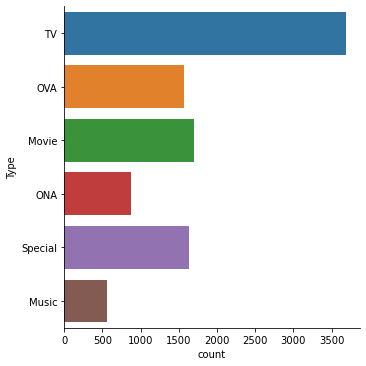

In [11]:
sb.catplot(y = 'Type', data = raw_data[raw_data.groupby('Type').Type.transform('count') > 25], kind='count')

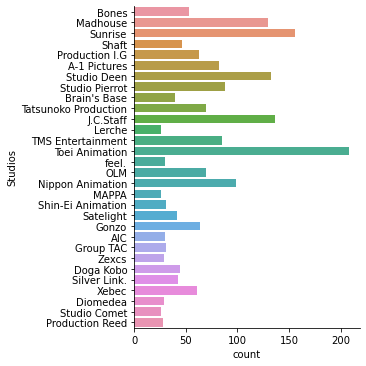

In [12]:
sb.catplot(y = 'Studios', data = TV_data[TV_data.groupby('Studios').Studios.transform('count') > 25], kind='count')

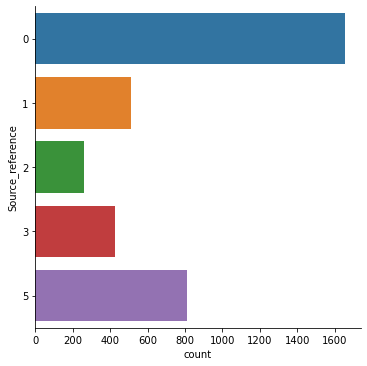

In [13]:
sb.catplot(y = 'Source_reference', data = TV_data[TV_data.groupby('Source_reference').Studios.transform('count') > 25], kind='count')

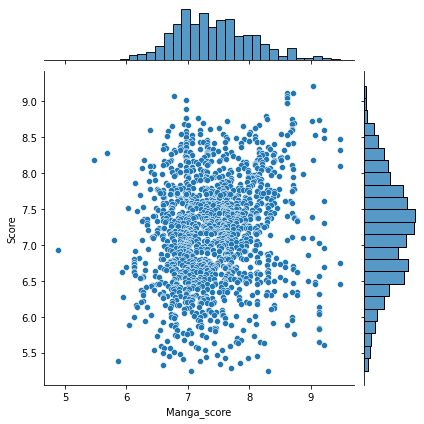

In [14]:
sb.jointplot(y = 'Score', x = 'Manga_score', data = TV_data_manga)

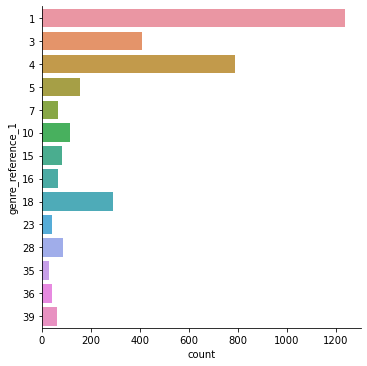

In [15]:
sb.catplot(y = 'genre_reference_1', data = TV_data[TV_data.groupby('genre_reference_1').Studios.transform('count') > 25], kind='count')

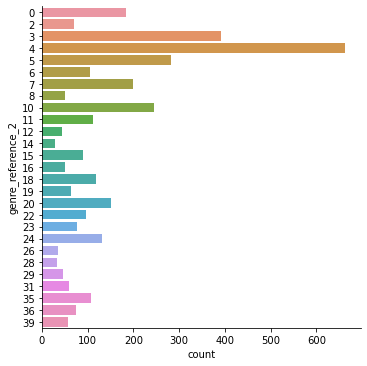

In [16]:
sb.catplot(y = 'genre_reference_2', data = TV_data[TV_data.groupby('genre_reference_2').Studios.transform('count') > 25], kind='count')

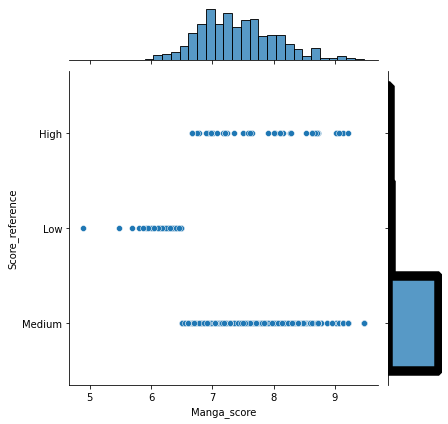

In [22]:
sb.jointplot(y = 'Score_reference', x = 'Manga_score', data = TV_data_manga)

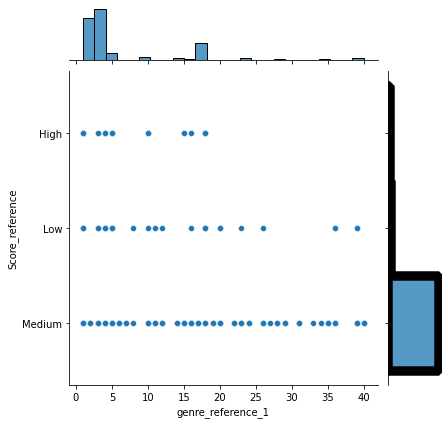

In [45]:
sb.jointplot(y = 'Score_reference', x = 'genre_reference_1', data = TV_data_manga)

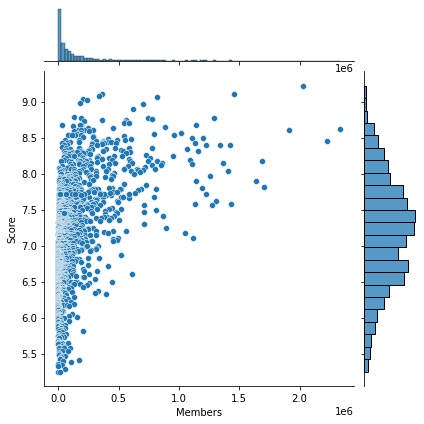

In [47]:
sb.jointplot(y = 'Score', x = 'Members', data = TV_data_manga)

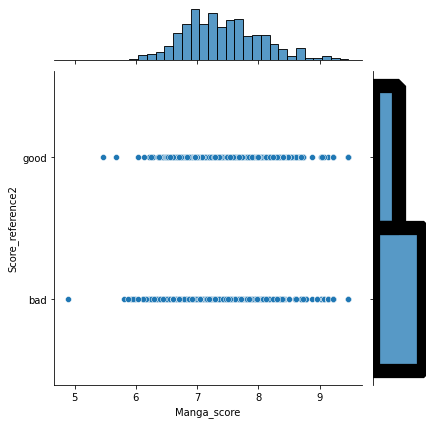

In [51]:
sb.jointplot(y = 'Score_reference2', x = 'Manga_score', data = TV_data_manga)